In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
import utils

elbowAnalysis
silhouetteAnalyis


In [3]:
data = pd.read_csv('data/Country-data.csv')
df = data.drop(['country'],axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Analysis

## Correlation

<AxesSubplot:>

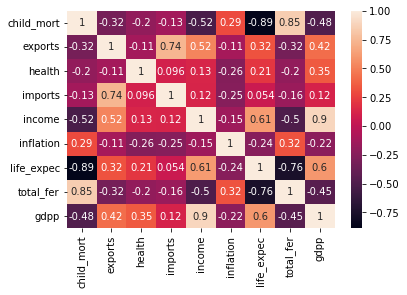

In [4]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

# Clustering

## Scale data

In [5]:
scaling=MinMaxScaler()
scaled=scaling.fit_transform(df)
scaled_df=pd.DataFrame(scaled, columns=df.columns)

# princt scaled dataset
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-means

### Elbow method to determine the number of clusters

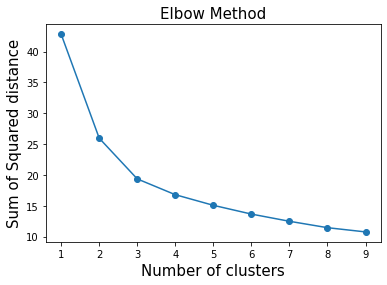

In [6]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(scaled_df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

### Train K-means with k=3

In [7]:
kmeans = KMeans(n_clusters = 3,random_state = 7)
kmeans.fit(scaled_df)
pd.Series(kmeans.labels_).value_counts()

0    87
1    46
2    34
dtype: int64

In [8]:
utils.internalValidation(scaled_df, kmeans.labels_)

{'_silhouette_score': 0.342654741051262,
 '_davies_bouldin_score': 1.1136713454787637}

### Prediction

In [9]:
cluster_labels = kmeans.fit_predict(scaled_df)
preds = kmeans.labels_
df['kmeans_clusters'] = preds
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Hierarchical Clustering

### Plot dendogram

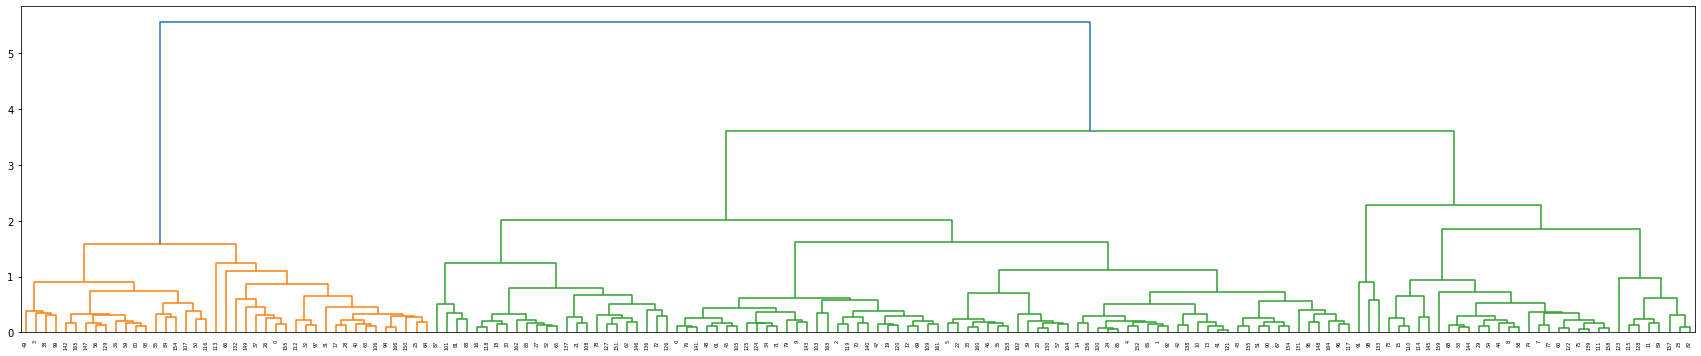

In [10]:
plt.figure(figsize=(30, 6))
dend=hcluster.dendrogram(hcluster.linkage(scaled_df,method='ward'))

### Train Hierarchical with k=3

In [11]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_df)
hcluster_label = hcluster.labels_
utils.internalValidation(scaled_df, hcluster_label)

{'_silhouette_score': 0.31627506051649634,
 '_davies_bouldin_score': 1.1918513486135558}

In [12]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_clusters,hcluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2


## Spectral clustering

### Eigengap heuristic

Optimal number of clusters [13 17  3 31  5]


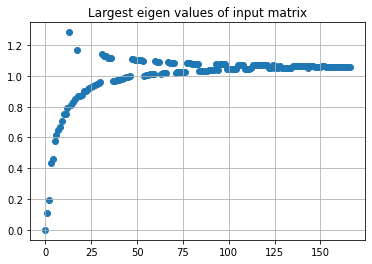

In [13]:
from spectral_clustering_utils import getAffinityMatrix, eigenDecomposition
affinity_matrix = getAffinityMatrix(scaled_df, k = 10)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

Train cluster with n_cluster = 3

In [14]:
from sklearn.cluster import SpectralClustering, AffinityPropagation
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(scaled_df)

In [15]:
utils.internalValidation(scaled_df, labels_nn)

{'_silhouette_score': 0.34499810264832764,
 '_davies_bouldin_score': 1.0256387143507386}

## PCA and spectral clustering

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(data=components,
                        columns=['component 1', 'component 2', 'component 3'])
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
labels_nn_pca = spectral_model_nn.fit_predict(pca_data)

In [25]:
sum(pca.explained_variance_ratio_)

0.8068706316671054

In [19]:
utils.internalValidation(pca_data, labels_nn_pca)

{'_silhouette_score': 0.4076554008737405,
 '_davies_bouldin_score': 0.9226179437085333}

# Visualization of results

## PCA interpretation

In [29]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.columns)
loadings

,PC1,PC2,PC3
child_mort,-0.476463,0.281733,0.100012
exports,0.170333,0.466644,-0.390524
health,0.133886,0.044510,0.781911
imports,0.081620,0.394257,-0.302775
income,0.306981,0.404405,0.068367
inflation,-0.088009,-0.001602,-0.057029
life_expec,0.420535,-0.137520,0.007857
total_fer,-0.571087,0.369246,0.174836
gdpp,0.338243,0.476078,0.309637


## Clusters

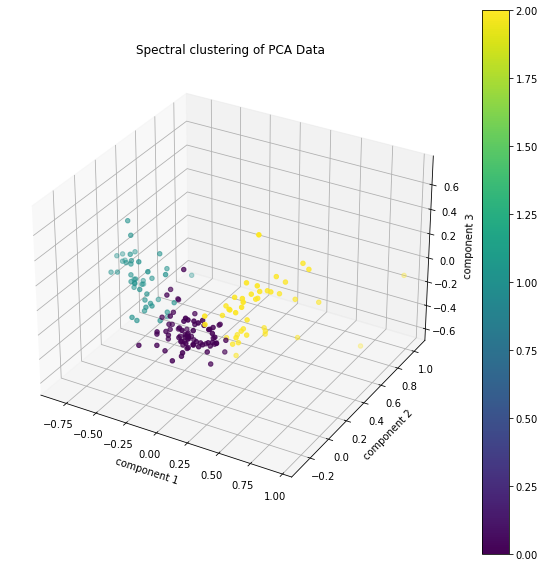

In [23]:
x = pca_data['component 1'].values
y = pca_data['component 2'].values
z = pca_data['component 3'].values

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(x, y, z, c = labels_nn_pca, cmap = "viridis")
plt.title("Spectral clustering of PCA Data")
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.colorbar(fg)

In [38]:
pca_data['cluster'] = labels_nn_pca
pca_data.groupby('cluster').agg({'component 1': 'mean', 'component 2': 'mean', 'component 3': 'mean', 'cluster': 'count'})

,component 1,component 2,component 3,cluster
cluster,,,,
0,0.051224,-0.117532,-0.069199,80
1,-0.515870,0.099965,0.046880,44
2,0.432567,0.116374,0.080772,43


## Give some example countries

In [41]:
data['cluster'] = labels_nn_pca

In [70]:
data[data['cluster']==0].tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
105,Morocco,33.5,32.200,5.20,43.0000,6440,0.976,73.5,2.58,2830,0
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988,0
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.100,68.3,2.61,592,0
117,Panama,19.7,70.000,8.10,78.2000,15400,2.590,77.8,2.62,8080,0
118,Paraguay,24.1,55.100,5.87,51.5000,7290,6.100,74.1,2.73,3230,0
119,Peru,20.3,27.800,5.08,23.8000,9960,5.710,77.9,2.54,5020,0
120,Philippines,31.9,34.800,3.61,36.6000,5600,4.220,69.0,3.16,2130,0
121,Poland,6.0,40.100,7.46,42.1000,21800,1.660,76.3,1.41,12600,0
124,Romania,11.5,32.600,5.58,38.8000,17800,3.530,73.7,1.59,8230,0
125,Russia,10.0,29.200,5.08,21.1000,23100,14.200,69.2,1.57,10700,0
